# Necessary Imports

In [813]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Data Loading

In [814]:
df = pd.read_csv('combined.csv')

In [815]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [816]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [817]:
df.shape

(1025, 14)

In [818]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

### Disease vs No- Disease Analysis

In [819]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

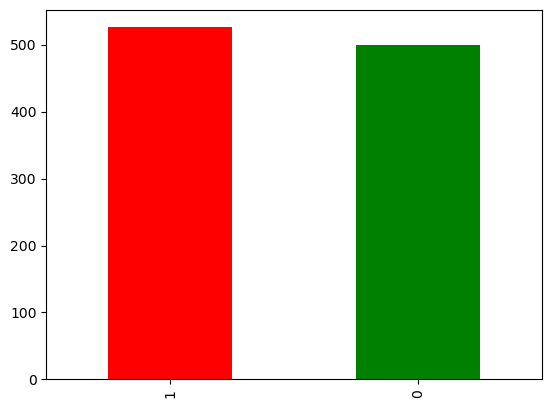

In [820]:
df.target.value_counts().plot(kind='bar',color=['red','green']);

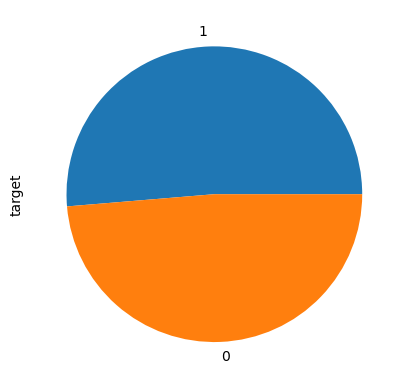

In [821]:
df.target.value_counts().plot(kind='pie');

### Sex dependency visualization

In [822]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [823]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


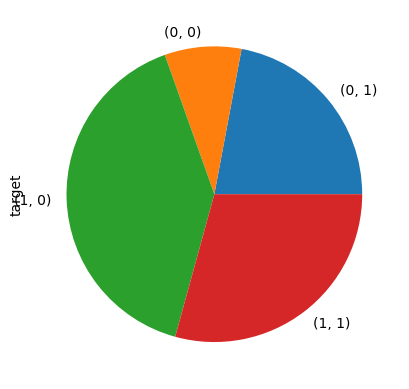

In [824]:
df.groupby(["sex"])["target"].value_counts().plot(kind="pie");

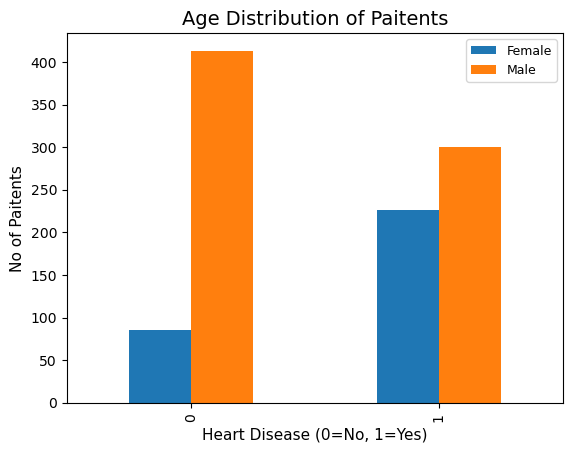

In [825]:
pd.crosstab(df.target, df.sex).plot(kind='bar');
plt.xlabel('Heart Disease (0=No, 1=Yes)', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Age Distribution of Paitents', fontsize = 14)
plt.legend(['Female','Male'], fontsize = 9);

### Further Analysis

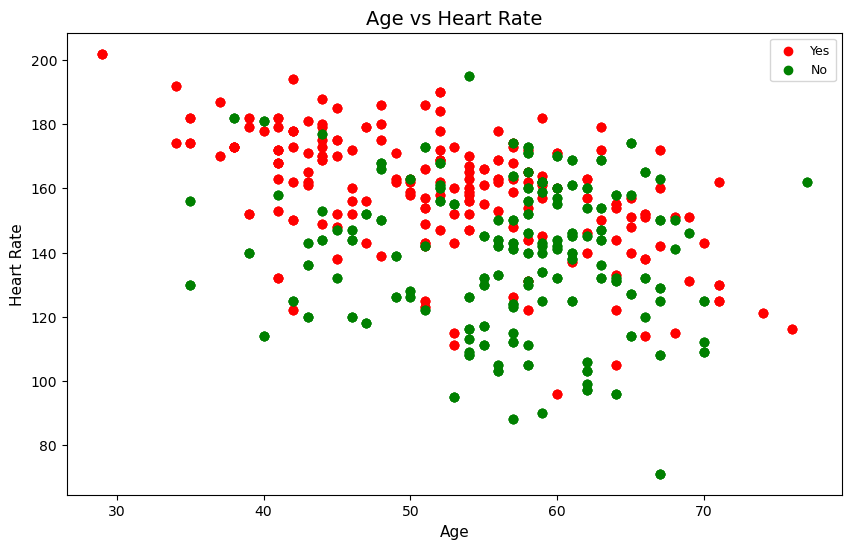

In [826]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='green')
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Heart Rate', fontsize = 11)
plt.title('Age vs Heart Rate', fontsize = 14)
plt.legend(['Yes','No'], fontsize = 9);

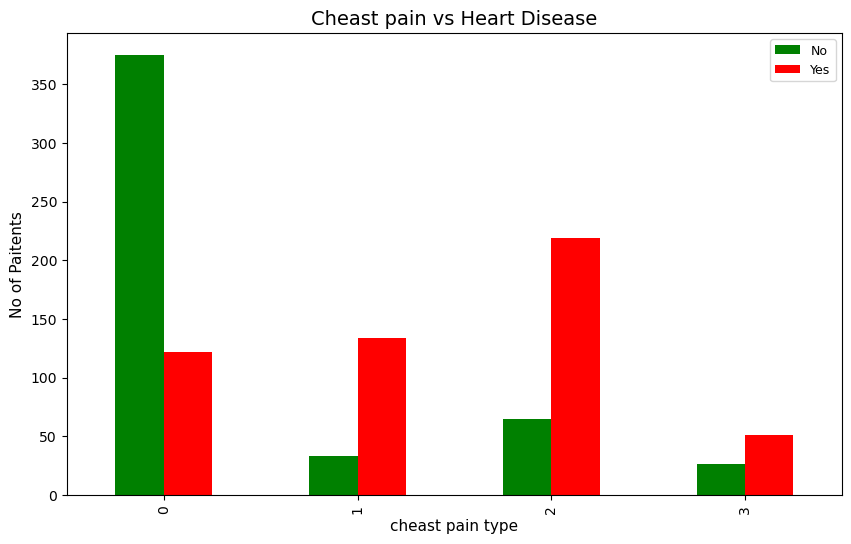

In [827]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['green', 'red']);
plt.xlabel('cheast pain type', fontsize = 11)
plt.ylabel('No of Paitents', fontsize = 11)
plt.title('Cheast pain vs Heart Disease', fontsize = 14)
plt.legend(['No','Yes'], fontsize = 9);

### Co-relation Analysis

In [828]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


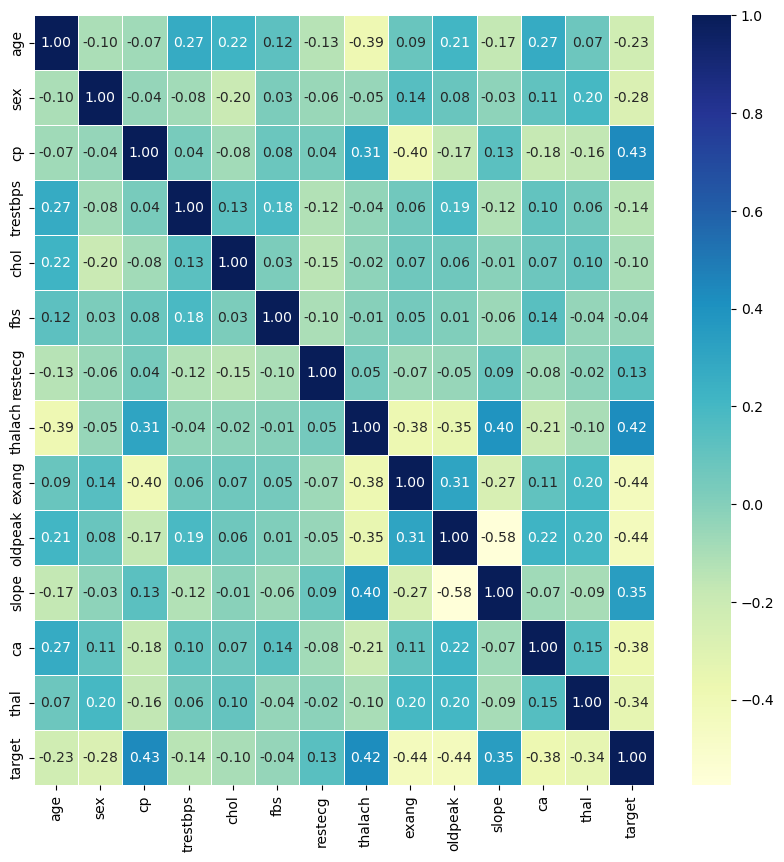

In [829]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linewidth=0.5, fmt='0.2f', cmap='YlGnBu');

# Preprocessing as per original paper

# 1. Handling missing values and OHE

In [830]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [831]:
df.columns = ['Age','Sex','Chest Pain','Rest BP','Cholestrol','Fasting Sugar','Ecg','Max Heart Rate','Exercise Angina', 'Oldpeak','Slope','Major Vessels','Defect Type','target']
df

,Age,Sex,Chest Pain,Rest BP,Cholestrol,Fasting Sugar,Ecg,Max Heart Rate,Exercise Angina,Oldpeak,Slope,Major Vessels,Defect Type,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [832]:
df.to_csv('final_data.csv')

# 3. Feature Selection

# 1. Relief

In [833]:
import pandas as pd
import numpy as np
from skrebate import ReliefF

X = df.drop('target', axis=1)
y = df.target

X = pd.get_dummies(X)
relief = ReliefF()
relief.fit(X.to_numpy(), y.to_numpy())

feature_scores = relief.feature_importances_

feature_ranking = pd.DataFrame({'Feature': X.columns, 'ReliefF Score': feature_scores})

# Sort the features by their ReliefF scores in descending order to get the ranking
feature_ranking = feature_ranking.sort_values(by='ReliefF Score', ascending=False)

# Print the ranked features
print(feature_ranking)

            Feature  ReliefF Score
2        Chest Pain       0.208878
12      Defect Type       0.208439
11    Major Vessels       0.175259
8   Exercise Angina       0.118741
10            Slope       0.101541
1               Sex       0.097620
9           Oldpeak       0.079494
7    Max Heart Rate       0.073661
0               Age       0.052169
3           Rest BP       0.048117
6               Ecg       0.040068
4        Cholestrol       0.021019
5     Fasting Sugar       0.009941


In [834]:
feature_ranking.index

Int64Index([2, 12, 11, 8, 10, 1, 9, 7, 0, 3, 6, 4, 5], dtype='int64')

# 2. Correlation Based FS

In [835]:
X = df.drop('target', axis=1)
y = df.target

score=[]
for feature in X.columns:
    correlation=df[feature].corr(y)
    score.append(correlation)
    
correlation_dict = {column: correlation for column, correlation in zip(X.columns, score)}
st = dict(sorted(correlation_dict.items(), key=lambda X: X[1], reverse=True))

my_dict = {"Feature" : [], "Score" : []}
key = [i for i in st.keys()]
score = [i for i in st.values()]
for i in key:
    my_dict['Feature'].append(i)
for i in score:
    my_dict['Score'].append(i)
    
res = pd.DataFrame.from_dict(my_dict)
res

,Feature,Score
0,Chest Pain,0.434854
1,Max Heart Rate,0.422895
2,Slope,0.345512
3,Ecg,0.134468
4,Fasting Sugar,-0.041164
5,Cholestrol,-0.099966
6,Rest BP,-0.138772
7,Age,-0.229324
8,Sex,-0.279501
9,Defect Type,-0.337838


# 3. Info Gain Based

In [836]:
X = df.drop('target', axis=1)
y = df.target

from sklearn.feature_selection import mutual_info_classif
info_gains = mutual_info_classif(X, y)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_ranking = feature_ranking.sort_values(by='Information Gain', ascending=False)
feature_ranking

,Feature,Information Gain
4,Cholestrol,0.268787
7,Max Heart Rate,0.158319
9,Oldpeak,0.145296
11,Major Vessels,0.134852
2,Chest Pain,0.126447
12,Defect Type,0.110718
10,Slope,0.103350
8,Exercise Angina,0.069060
3,Rest BP,0.052017
0,Age,0.051018


In [837]:
feature_ranking.index

Int64Index([4, 7, 9, 11, 2, 12, 10, 8, 3, 0, 1, 6, 5], dtype='int64')

# 4. SelectKBest

In [838]:
new = pd.read_csv('final_data.csv')
new.drop(['Unnamed: 0'], axis = 1, inplace = True)
new

X = new.drop('target', axis=1)
y = new.target

from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k='all')
X_new = k_best.fit_transform(X, y)
feature_scores = k_best.scores_
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
print(feature_scores_df)

            Feature       Score
7    Max Heart Rate  650.008493
9           Oldpeak  253.653461
2        Chest Pain  217.823922
11    Major Vessels  210.625919
8   Exercise Angina  130.470927
4        Cholestrol  110.723364
0               Age   81.425368
3           Rest BP   45.974069
10            Slope   33.673948
1               Sex   24.373650
12      Defect Type   19.373465
6               Ecg    9.739343
5     Fasting Sugar    1.477550


In [839]:
feature_scores_df.index

Int64Index([7, 9, 2, 11, 8, 4, 0, 3, 10, 1, 12, 6, 5], dtype='int64')

In [840]:
new

,Age,Sex,Chest Pain,Rest BP,Cholestrol,Fasting Sugar,Ecg,Max Heart Rate,Exercise Angina,Oldpeak,Slope,Major Vessels,Defect Type,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [841]:
rank_matrix = [
    [2, 12, 11, 8, 10, 1, 9, 7, 0, 3, 6, 4, 5],
    [4, 7, 2, 9, 12, 11, 8, 0, 3, 10, 6, 1, 5],
    [7, 9, 2, 11, 8, 4, 0, 3, 10, 1, 12, 6, 5],
    [2, 7, 10, 6, 5, 4, 3, 0, 1, 12, 11, 8, 9]
]

In [842]:
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer

# trf1 = ColumnTransformer([
#     ('imputer1',SimpleImputer(strategy = 'mean'),['Age','Rest BP','Cholestrol','Max Heart Rate','Oldpeak']),
#     ('imputer2',SimpleImputer(strategy='most_frequent'),['Sex','Chest Pain','Fasting Sugar','Ecg','Exercise Angina','Slope','Major Vessels','Defect Type'])
# ],remainder='passthrough')

# trf2 = ColumnTransformer([
#     ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),['Sex','Chest Pain','Fasting Sugar','Ecg','Exercise Angina','Slope','Major Vessels','Defect Type'])
# ],remainder='passthrough')

In [843]:
#trf1 = ColumnTransformer([
#    ('imputer1',imputer1,['Age','Rest BP','Cholestrol','Max Heart Rate','Oldpeak']),
#    ('imputer2',imputer2,['Sex','Chest Pain','Fasting Sugar','Ecg','Exercise Angina','Slope','Major Vessels','Defect Type'])
#],remainder='passthrough')

# trf1.fit_transform(df2)
# df2 = trf1.transform(df2)
# df2

In [844]:
# df2 = pd.DataFrame(df2, columns = df.columns)
# df2

# 2. Normalization

In [845]:
df

,Age,Sex,Chest Pain,Rest BP,Cholestrol,Fasting Sugar,Ecg,Max Heart Rate,Exercise Angina,Oldpeak,Slope,Major Vessels,Defect Type,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [846]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'Rest BP', 'Cholestrol', 'Fasting Sugar',
       'Ecg', 'Max Heart Rate', 'Exercise Angina', 'Oldpeak', 'Slope',
       'Major Vessels', 'Defect Type', 'target'],
      dtype='object')

In [847]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[['Age','Rest BP','Cholestrol','Max Heart Rate','Oldpeak']] = mms.fit_transform(df[['Age','Rest BP','Cholestrol','Max Heart Rate','Oldpeak']])

In [848]:
df

,Age,Sex,Chest Pain,Rest BP,Cholestrol,Fasting Sugar,Ecg,Max Heart Rate,Exercise Angina,Oldpeak,Slope,Major Vessels,Defect Type,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1,1,0.433962,0.216895,0,1,0.709924,1,0.000000,2,0,2,1
1021,0.645833,1,0,0.292453,0.301370,0,0,0.534351,1,0.451613,1,1,3,0
1022,0.375000,1,0,0.150943,0.340183,0,0,0.358779,1,0.161290,1,1,2,0
1023,0.437500,0,0,0.150943,0.292237,0,0,0.671756,0,0.000000,2,0,2,1


In [849]:
# from sklearn.preprocessing import MinMaxScaler
# trf3 = ColumnTransformer([
#         ('scaler', MinMaxScaler(), ['Age','Rest BP','Cholestrol','Max Heart Rate','Oldpeak'])
#     ], remainder='passthrough')

# df2 = trf3.fit_transform(df2)
# df2

In [850]:
df = pd.get_dummies(df, columns = ['Sex','Chest Pain','Fasting Sugar','Ecg','Exercise Angina','Slope','Major Vessels','Defect Type'])
df

,Age,Rest BP,Cholestrol,Max Heart Rate,Oldpeak,target,Sex_0,Sex_1,Chest Pain_0,Chest Pain_1,...,Slope_2,Major Vessels_0,Major Vessels_1,Major Vessels_2,Major Vessels_3,Major Vessels_4,Defect Type_0,Defect Type_1,Defect Type_2,Defect Type_3
0,0.479167,0.292453,0.196347,0.740458,0.161290,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.854167,0.481132,0.109589,0.412214,0.419355,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.666667,0.509434,0.175799,0.687023,0.000000,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.687500,0.415094,0.383562,0.267176,0.306452,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,0.433962,0.216895,0.709924,0.000000,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,0.645833,0.292453,0.301370,0.534351,0.451613,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,0.375000,0.150943,0.340183,0.358779,0.161290,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,0.437500,0.150943,0.292237,0.671756,0.000000,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [736]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        X.loc[(X < lower_bound)] = lower_bound 
        X.loc[(X > upper_bound)] = upper_bound
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)

In [737]:
outlier_remover = OutlierRemover()
outlier_remover.fit(df)
outlier_remover.transform(df)
df

,Age,Rest BP,Cholestrol,Max Heart Rate,Oldpeak,target,Sex_0,Sex_1,Chest Pain_0,Chest Pain_1,...,Slope_2,Major Vessels_0,Major Vessels_1,Major Vessels_2,Major Vessels_3,Major Vessels_4,Defect Type_0,Defect Type_1,Defect Type_2,Defect Type_3
0,0.479167,0.292453,0.196347,0.740458,0.161290,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.854167,0.481132,0.109589,0.412214,0.419355,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.666667,0.509434,0.175799,0.687023,0.000000,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.687500,0.415094,0.383562,0.267176,0.306452,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,0.433962,0.216895,0.709924,0.000000,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,0.645833,0.292453,0.301370,0.534351,0.451613,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,0.375000,0.150943,0.340183,0.358779,0.161290,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,0.437500,0.150943,0.292237,0.671756,0.000000,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [738]:
# li = df.columns
# trf4 = ColumnTransformer([
#     ('outlier_remover',OutlierRemover(),5)
#     ],remainder='passthrough')
# trf4.fit_transform(df)
# df = pd.DataFrame(df, columns = li)
# df

# Proposed Methodology

In [739]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.2,
                                                    random_state=0)

In [740]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [741]:
df

,Age,Rest BP,Cholestrol,Max Heart Rate,Oldpeak,target,Sex_0,Sex_1,Chest Pain_0,Chest Pain_1,...,Slope_2,Major Vessels_0,Major Vessels_1,Major Vessels_2,Major Vessels_3,Major Vessels_4,Defect Type_0,Defect Type_1,Defect Type_2,Defect Type_3
0,0.479167,0.292453,0.196347,0.740458,0.161290,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.854167,0.481132,0.109589,0.412214,0.419355,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.666667,0.509434,0.175799,0.687023,0.000000,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.687500,0.415094,0.383562,0.267176,0.306452,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,0.433962,0.216895,0.709924,0.000000,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,0.645833,0.292453,0.301370,0.534351,0.451613,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,0.375000,0.150943,0.340183,0.358779,0.161290,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,0.437500,0.150943,0.292237,0.671756,0.000000,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [742]:
x_train

,Age,Rest BP,Cholestrol,Max Heart Rate,Oldpeak,Sex_0,Sex_1,Chest Pain_0,Chest Pain_1,Chest Pain_2,...,Slope_2,Major Vessels_0,Major Vessels_1,Major Vessels_2,Major Vessels_3,Major Vessels_4,Defect Type_0,Defect Type_1,Defect Type_2,Defect Type_3
315,0.270833,0.509434,0.269406,0.816794,0.129032,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
204,0.770833,0.490566,0.347032,0.618321,0.000000,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
363,0.500000,0.339623,0.273973,0.778626,0.000000,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,0.604167,0.056604,0.278539,0.389313,0.161290,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1017,0.500000,0.273585,0.356164,0.183206,0.322581,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.416667,0.226415,0.052511,0.419847,0.129032,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
192,0.791667,0.198113,1.000000,0.679389,0.258065,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
629,0.750000,0.415094,0.356164,0.786260,0.225806,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
559,0.791667,0.245283,0.253425,0.000000,0.161290,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [743]:
y_train

315     1
204     1
363     1
5       1
1017    0
       ..
835     0
192     1
629     0
559     0
684     0
Name: target, Length: 820, dtype: int64

In [744]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

Before SMOTE: 
1 :  419
0 :  401


In [745]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

In [746]:
x_train1

,Age,Rest BP,Cholestrol,Max Heart Rate,Oldpeak,Sex_0,Sex_1,Chest Pain_0,Chest Pain_1,Chest Pain_2,...,Slope_2,Major Vessels_0,Major Vessels_1,Major Vessels_2,Major Vessels_3,Major Vessels_4,Defect Type_0,Defect Type_1,Defect Type_2,Defect Type_3
0,0.270833,0.509434,0.269406,0.816794,0.129032,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0.770833,0.490566,0.347032,0.618321,0.000000,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0.500000,0.339623,0.273973,0.778626,0.000000,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0.604167,0.056604,0.278539,0.389313,0.161290,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.500000,0.273585,0.356164,0.183206,0.322581,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.375500,0.343306,0.292793,0.592623,0.003148,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
834,0.604167,0.188679,0.438356,0.526718,0.709677,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
835,0.395833,0.339623,0.296804,0.603053,0.000000,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
836,0.687750,0.239145,0.441409,0.447601,0.601828,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [747]:
y_train1

0      1
1      1
2      1
3      1
4      0
      ..
833    0
834    0
835    0
836    0
837    0
Name: target, Length: 838, dtype: int64

In [748]:
print("After SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train1:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

After SMOTE: 
1 :  419
0 :  419


In [749]:
print(x_train1.shape,x_test.shape,X.shape)
print(y_train1.shape,y_test.shape,y.shape)

(838, 30) (205, 30) (1025, 13)
(838,) (205,) (1025,)


# Logistic Regression

In [750]:
parameters = {'penalty':['l2'], 'C':[1.0, 10.0, 100.0, 1000.0],'fit_intercept':[True,False]}
model = LogisticRegression(max_iter=3000)
clf = GridSearchCV(model, parameters)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for LR:", logreg_best_param)

Best params for LR: {'C': 10.0, 'fit_intercept': True, 'penalty': 'l2'}


              precision    recall  f1-score   support

           0       0.92      0.86      0.89        98
           1       0.88      0.93      0.90       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



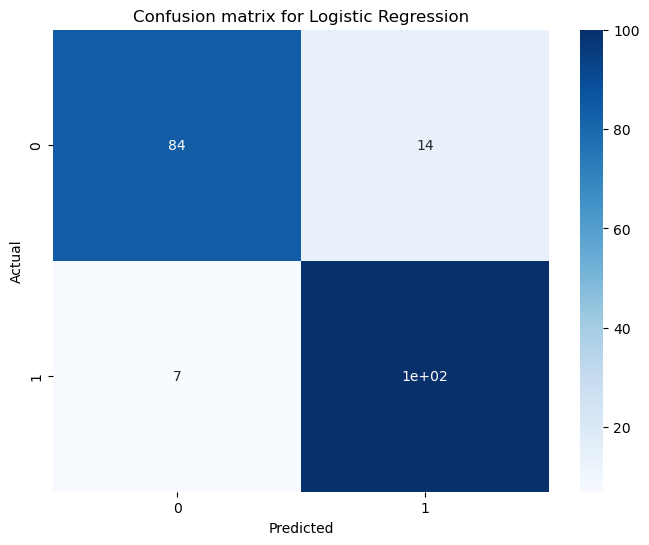

In [751]:
predict = clf.predict(x_test)
print(classification_report(y_test, predict))
cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

# SVM

In [752]:
from sklearn import svm, datasets
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1.0, 10.0, 100.0, 1000.0],
              'gamma':[1,0.1,0.01]}

model = svm.SVC()

clf = GridSearchCV(model, parameters)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for SVM:", logreg_best_param)

Best params for SVM: {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



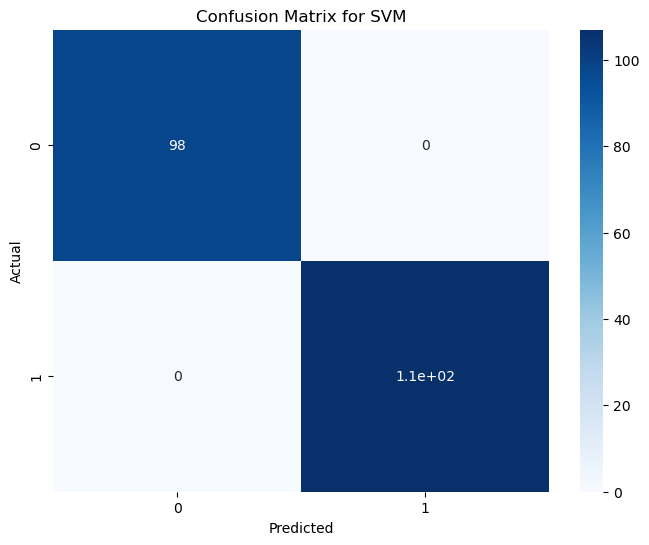

In [753]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# Random Forest

In [754]:
parameters = {
    'n_estimators' : [20,60,80,100,120,150,180,200],
    'max_depth' : [4,5,6,7,8,9,10,None],
    'criterion' :['gini','entropy']
   }


model = RandomForestClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for RF:", logreg_best_param)

Best params for RF: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 120}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



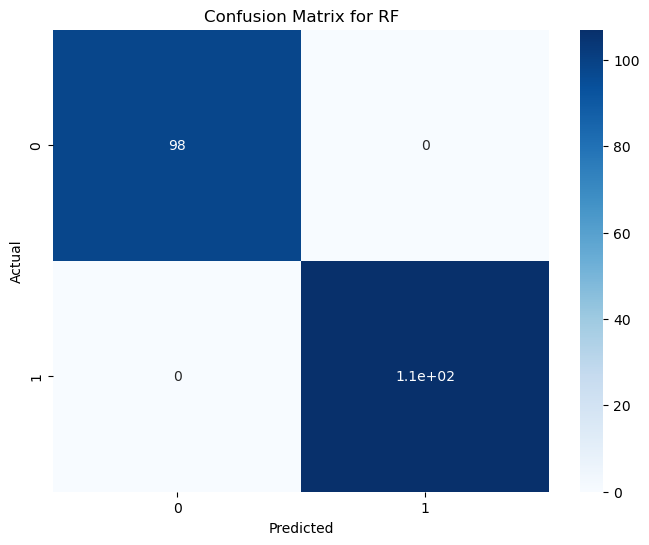

In [755]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RF')
plt.show()

In [756]:
accuracy = accuracy_score(y_test, predict)
accuracy

1.0

# KNN

In [757]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

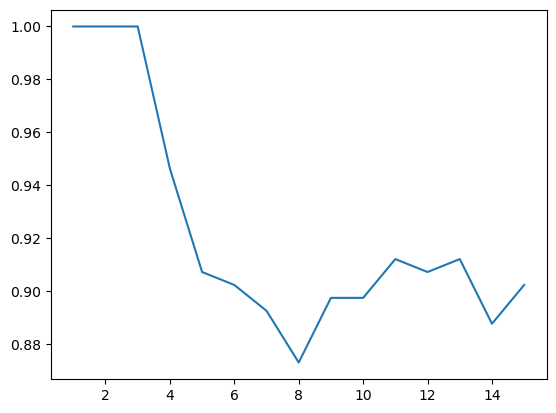

In [758]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



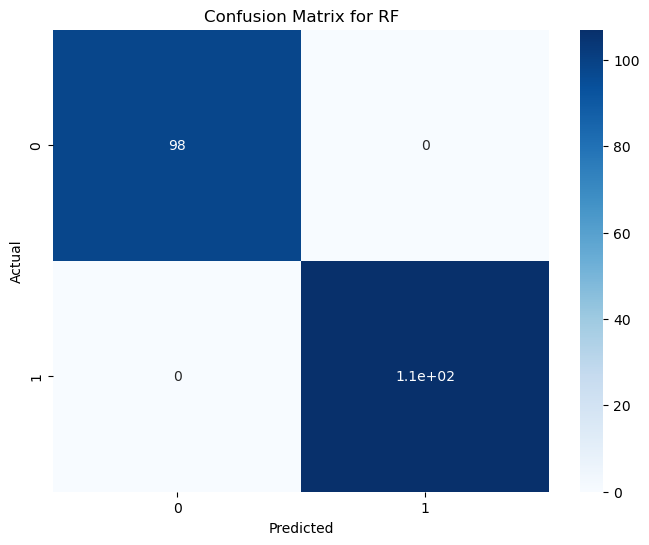

In [759]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train1,y_train1)
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RF')
plt.show()

# Decision Trees

In [760]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, None],
              'criterion' :['gini', 'entropy']
             }

model = DecisionTreeClassifier()
clf = GridSearchCV(model, param_grid)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for DT:", logreg_best_param)

Best params for DT: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



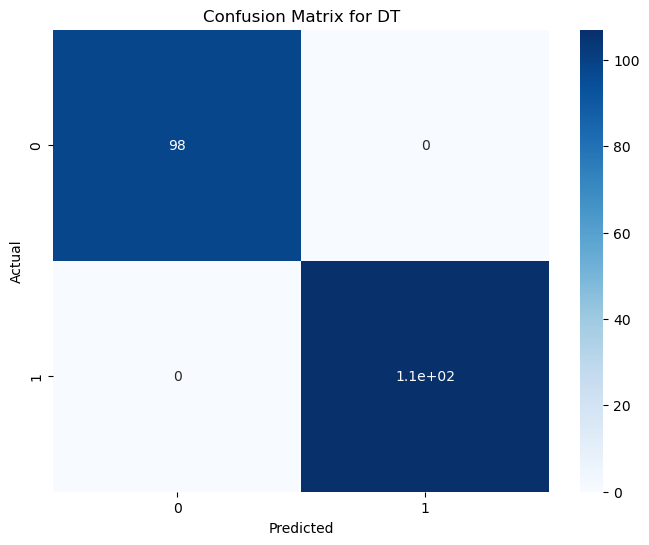

In [761]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DT')
plt.show()

# Optimal Feature Selection Technique

In [803]:
rank_matrix

[[2, 12, 11, 8, 10, 1, 9, 7, 0, 3, 6, 4, 5],
 [4, 7, 2, 9, 12, 11, 8, 0, 3, 10, 6, 1, 5],
 [7, 9, 2, 11, 8, 4, 0, 3, 10, 1, 12, 6, 5],
 [2, 7, 10, 6, 5, 4, 3, 0, 1, 12, 11, 8, 9]]

In [806]:
f_list=['Age', 'Sex', 'Chest Pain', 'Rest BP', 'Cholestrol', 'Fasting Sugar',
       'Ecg', 'Max Heart Rate', 'Exercise Angina', 'Oldpeak', 'Slope',
       'Major Vessels', 'Defect Type']

features=[]
ans_list=[0 for i in range(len(rank_matrix[0]))]
for i in range(13):
    for j in range(0,len(rank_matrix)):
        for k in range(0,len(rank_matrix[0])):
            if rank_matrix[j][k]==i+1 and ans_list[k]!=-1:
                ans_list[k]+=1
    max_ele=max(ans_list)
    max_index=ans_list.index(max_ele)
    ans_list[max_index]=-1
    features.append(f_list[max_index])

In [807]:
features

['Fasting Sugar',
 'Age',
 'Chest Pain',
 'Exercise Angina',
 'Defect Type',
 'Major Vessels',
 'Sex',
 'Rest BP',
 'Ecg',
 'Cholestrol',
 'Oldpeak',
 'Slope',
 'Max Heart Rate']

In [809]:
cols = ['Fasting Sugar',
 'Age',
 'Chest Pain',
 'Exercise Angina',
 'Defect Type',
 'Major Vessels',
 'Sex',
 'Rest BP',
 'Ecg',
 'Cholestrol',
 'Oldpeak',
 'Slope',
 'Max Heart Rate','target']

In [811]:
new = new[cols]
new

,Fasting Sugar,Age,Chest Pain,Exercise Angina,Defect Type,Major Vessels,Sex,Rest BP,Ecg,Cholestrol,Oldpeak,Slope,Max Heart Rate,target
0,0,52,0,0,3,2,1,125,1,212,1.0,2,168,0
1,1,53,0,1,3,0,1,140,0,203,3.1,0,155,0
2,0,70,0,1,3,0,1,145,1,174,2.6,0,125,0
3,0,61,0,0,3,1,1,148,1,203,0.0,2,161,0
4,1,62,0,0,2,3,0,138,1,294,1.9,1,106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0,59,1,1,2,0,1,140,1,221,0.0,2,164,1
1021,0,60,0,1,3,1,1,125,0,258,2.8,1,141,0
1022,0,47,0,1,2,1,1,110,0,275,1.0,1,118,0
1023,0,50,0,0,2,0,0,110,0,254,0.0,2,159,1


Best params for RF: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 120}

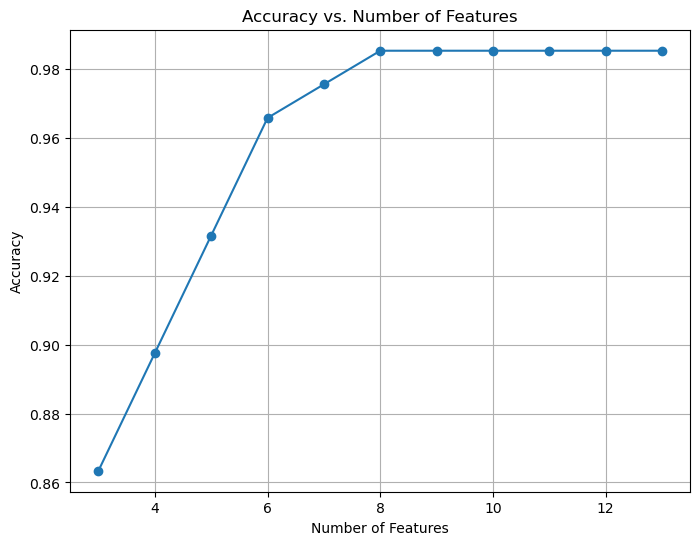

In [812]:
target = 'target'  
data = new
accuracy_scores = []
num_features_range = range(3, 14)

for num_features in num_features_range:
    selected_features = data.columns[:num_features]
    X = data[selected_features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 120)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(num_features_range, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# 8 is the optimal number of features